In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
etf_csv = 'iex_parsed/qqq_20231026.csv'
letf_csv = 'iex_parsed/tqqq_20231026.csv'

# Read ETF and LETF data
etf_df = pd.read_csv(etf_csv, header=None, names=['timestamp', 'ticker', 'order_size', 'price'])
letf_df = pd.read_csv(letf_csv, header=None, names=['timestamp', 'ticker', 'order_size', 'price'])

# Sort data by timestamp
etf_df.sort_values(by='timestamp', inplace=True)
letf_df.sort_values(by='timestamp', inplace=True)

# Normalizing the prices
etf_start_price = etf_df['price'].iloc[0]
letf_start_price = letf_df['price'].iloc[0]

etf_df['normalized_price'] = etf_df['price'] / etf_start_price * 100
letf_df['normalized_price'] = letf_df['price'] / letf_start_price * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(etf_df['timestamp'], etf_df['normalized_price'], label='Normalized ETF Price')
plt.plot(letf_df['timestamp'], letf_df['normalized_price'], label='Normalized LETF Price')
plt.xlabel('Timestamp')
plt.ylabel('Normalized Price (Base 100)')
plt.title('Normalized ETF and LETF Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


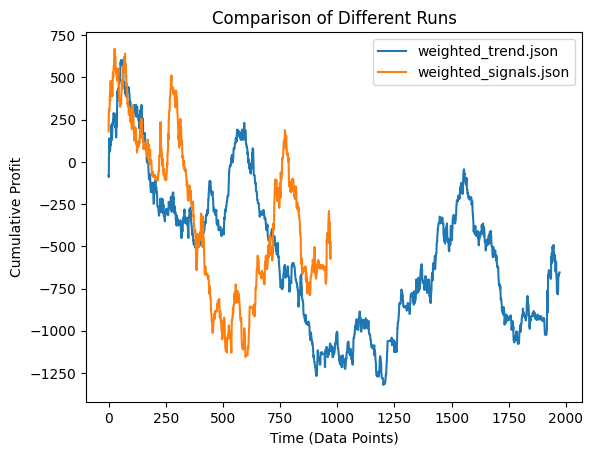

In [7]:
import json
import matplotlib.pyplot as plt
import os

def overlay_graphs(directory):
    # List all JSON files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.json')]

    for file in files:
        with open(os.path.join(directory, file), 'r') as json_file:
            data = json.load(json_file)
            plt.plot(data['profits'], label=file)

    plt.xlabel('Time (Data Points)')
    plt.ylabel('Cumulative Profit')
    plt.title('Comparison of Different Runs')
    plt.legend()
    plt.savefig('different_weights.png')
    plt.show()

overlay_graphs('backtesting_results')
